Using Colab cache for faster access to the 'traffic-accidents' dataset.


/tmp/ipython-input-52841033.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time] = pd.to_datetime(df[time], errors="coerce")


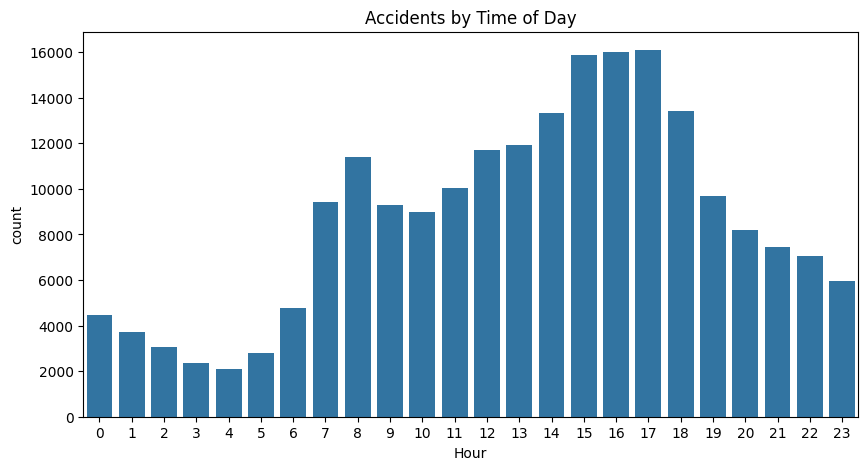

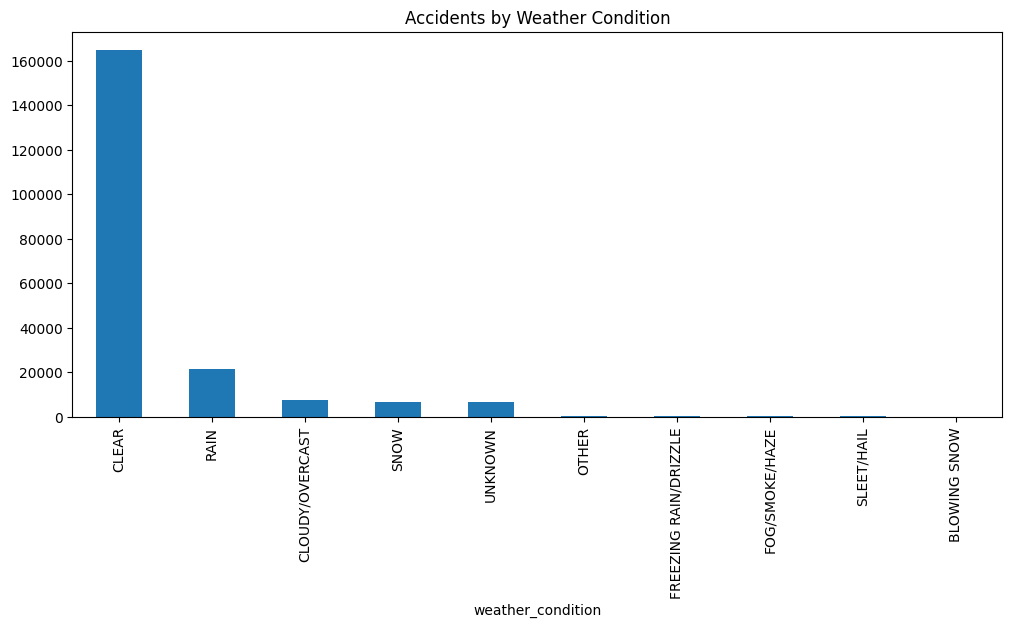

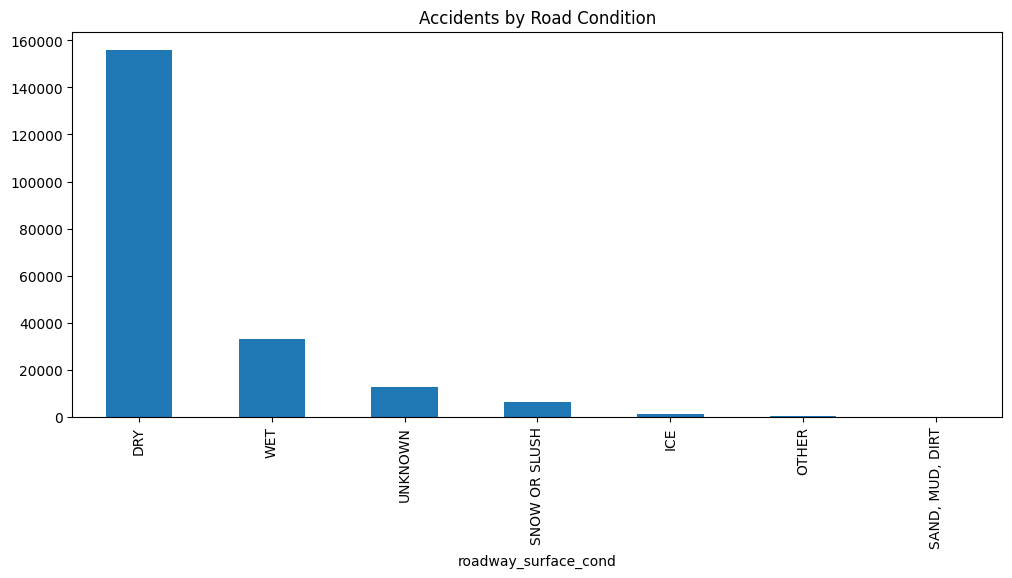

In [8]:
!pip install kagglehub pandas matplotlib seaborn folium plotly > /dev/null

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import glob
import os

path = kagglehub.dataset_download("oktayrdeki/traffic-accidents")
csv_file = glob.glob(os.path.join(path, "**/*.csv"), recursive=True)[0]
df = pd.read_csv(csv_file)

cols = {c.lower(): c for c in df.columns}

lat = next((cols[c] for c in cols if "lat" in c), None)
lon = next((cols[c] for c in cols if "lon" in c or "lng" in c), None)
time = next((cols[c] for c in cols if "time" in c or "date" in c), None)
weather = next((cols[c] for c in cols if "weather" in c), None)
road = next((cols[c] for c in cols if "road" in c), None)
severity = next((cols[c] for c in cols if "severity" in c), None)

if time:
    df[time] = pd.to_datetime(df[time], errors="coerce")
    df["Hour"] = df[time].dt.hour
    plt.figure(figsize=(10,5))
    sns.countplot(x="Hour", data=df)
    plt.title("Accidents by Time of Day")
    plt.show()

if weather:
    plt.figure(figsize=(12,5))
    df[weather].value_counts().head(10).plot(kind="bar")
    plt.title("Accidents by Weather Condition")
    plt.show()

if road:
    plt.figure(figsize=(12,5))
    df[road].value_counts().plot(kind="bar")
    plt.title("Accidents by Road Condition")
    plt.show()

if lat and lon:
    map_df = df[[lat, lon]].dropna().sample(min(8000, len(df)), random_state=1)
    m = folium.Map(location=[map_df[lat].mean(), map_df[lon].mean()], zoom_start=6)
    HeatMap(map_df.values.tolist()).add_to(m)
    m

if weather and severity:
    sun_df = df[[weather, severity]].dropna().sample(min(15000, len(df)), random_state=1)
    fig = px.sunburst(sun_df, path=[weather, severity], title="Weather vs Accident Severity")
    fig.show()


Using Colab cache for faster access to the 'traffic-accidents' dataset.


/tmp/ipython-input-4042203830.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time] = pd.to_datetime(df[time], errors="coerce")


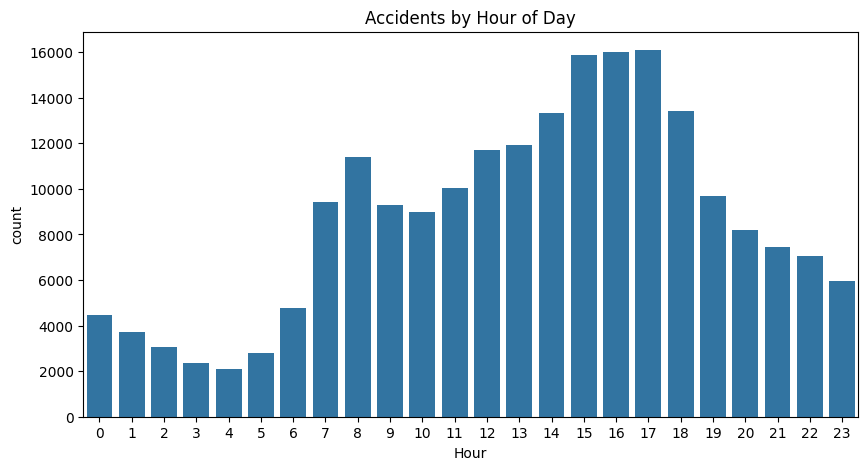

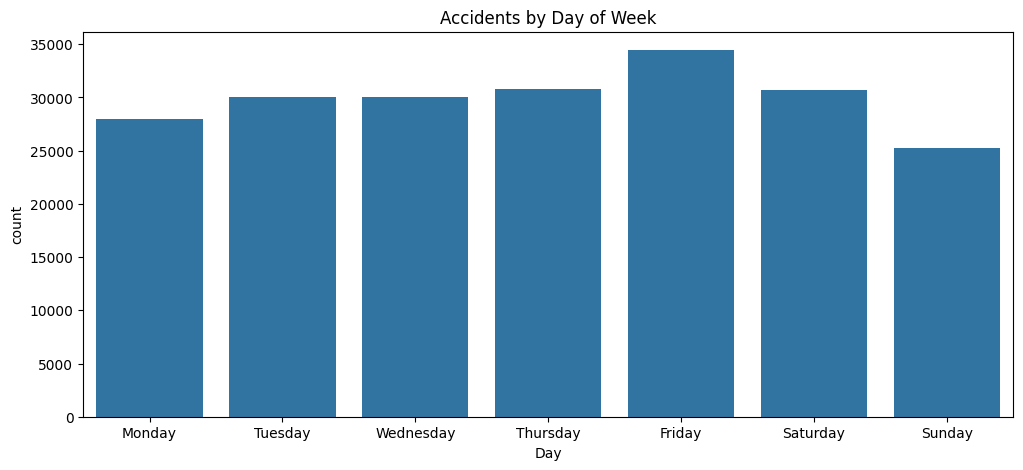

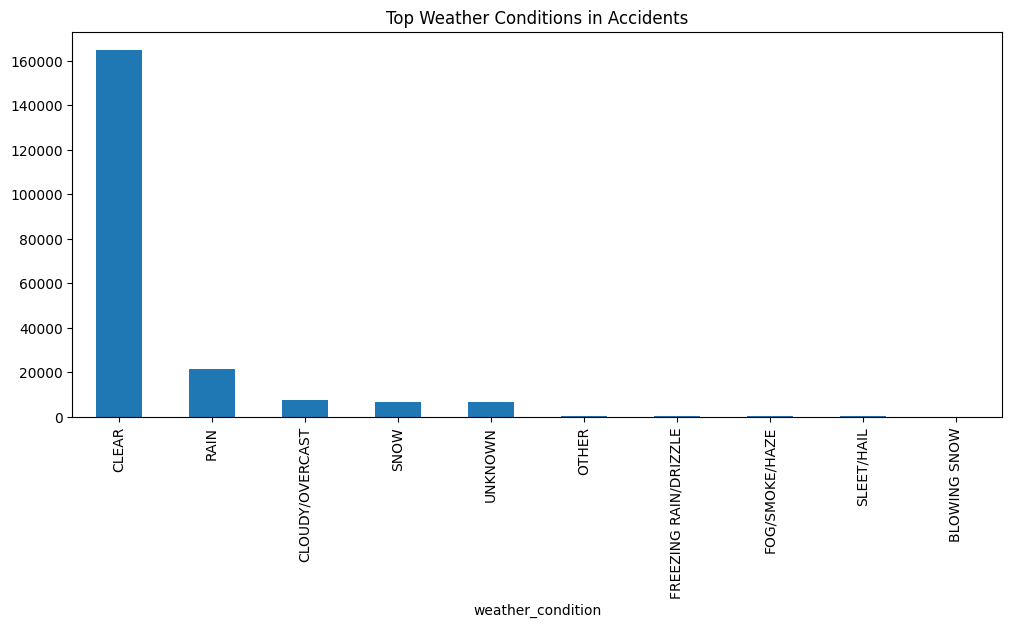

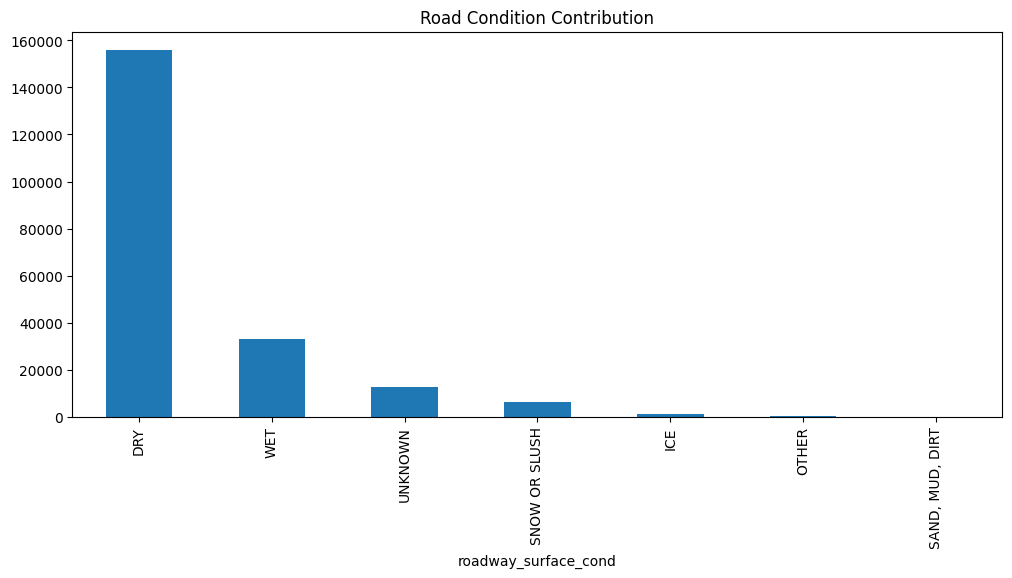

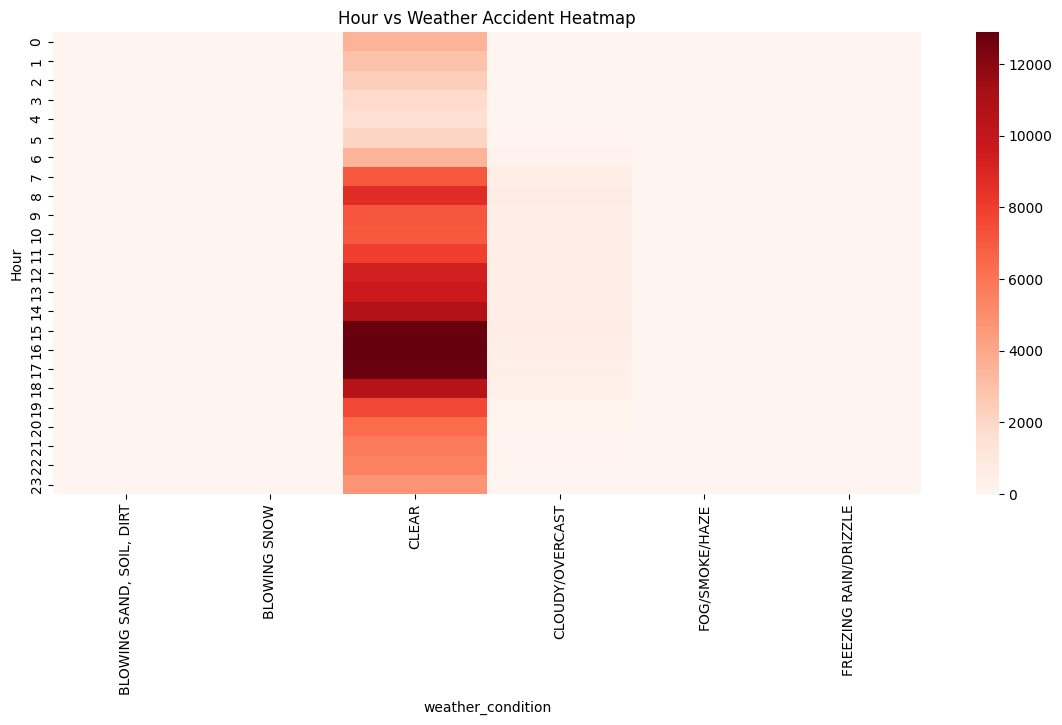

In [9]:
!pip install kagglehub pandas matplotlib seaborn folium plotly > /dev/null

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import glob
import os

path = kagglehub.dataset_download("oktayrdeki/traffic-accidents")
csv_file = glob.glob(os.path.join(path, "**/*.csv"), recursive=True)[0]
df = pd.read_csv(csv_file)

cols = {c.lower(): c for c in df.columns}

lat = next((cols[c] for c in cols if "lat" in c), None)
lon = next((cols[c] for c in cols if "lon" in c or "lng" in c), None)
time = next((cols[c] for c in cols if "time" in c or "date" in c), None)
weather = next((cols[c] for c in cols if "weather" in c), None)
road = next((cols[c] for c in cols if "road" in c), None)
severity = next((cols[c] for c in cols if "severity" in c), None)

if time:
    df[time] = pd.to_datetime(df[time], errors="coerce")
    df["Hour"] = df[time].dt.hour
    df["Day"] = df[time].dt.day_name()

if lat and lon:
    map_df = df[[lat, lon]].dropna().sample(min(10000, len(df)), random_state=1)
    base_map = folium.Map(location=[map_df[lat].mean(), map_df[lon].mean()], zoom_start=6)
    HeatMap(map_df.values.tolist(), radius=10).add_to(base_map)
    base_map

if lat and lon and time:
    df["TimeBin"] = pd.cut(df["Hour"], bins=[0,6,12,18,24], labels=["Night","Morning","Afternoon","Evening"], include_lowest=True)
    time_map = df[[lat, lon, "TimeBin"]].dropna()
    for t in time_map["TimeBin"].unique():
        sub = time_map[time_map["TimeBin"] == t].sample(min(3000, len(time_map)), random_state=1)
        m = folium.Map(location=[sub[lat].mean(), sub[lon].mean()], zoom_start=6)
        HeatMap(sub[[lat, lon]].values.tolist(), radius=8).add_to(m)
        display(m)

if time:
    plt.figure(figsize=(10,5))
    sns.countplot(x="Hour", data=df)
    plt.title("Accidents by Hour of Day")
    plt.show()

    plt.figure(figsize=(12,5))
    sns.countplot(x="Day", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    plt.title("Accidents by Day of Week")
    plt.show()

if weather:
    plt.figure(figsize=(12,5))
    df[weather].value_counts().head(10).plot(kind="bar")
    plt.title("Top Weather Conditions in Accidents")
    plt.show()

if road:
    plt.figure(figsize=(12,5))
    df[road].value_counts().head(10).plot(kind="bar")
    plt.title("Road Condition Contribution")
    plt.show()

if weather and time:
    pivot = pd.pivot_table(df, index="Hour", columns=weather, aggfunc="size", fill_value=0)
    plt.figure(figsize=(14,6))
    sns.heatmap(pivot.iloc[:, :6], cmap="Reds")
    plt.title("Hour vs Weather Accident Heatmap")
    plt.show()

if weather and severity:
    sun_df = df[[weather, severity]].dropna().sample(min(20000, len(df)), random_state=1)
    fig = px.sunburst(sun_df, path=[weather, severity], title="Weather vs Accident Severity")
    fig.show()
